In [2]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
from keras.datasets.cifar10 import load_data
((x_train, y_train), (x_test, y_test)) = load_data()

170500096/170498071 [==============================] - 539s 3us/step


In [4]:
print("訓練的維度:", x_train.shape)
print("測試的維度:", x_test.shape)

訓練的維度: (50000, 32, 32, 3)
測試的維度: (10000, 32, 32, 3)


In [13]:
mapdict = {0:"飛機", 1:"汽車", 2:"鳥", 3:"貓", 4:"鹿", 5:"狗", 6:"青蛙",
           7:"馬", 8:"船", 9:"貨車"}

標籤: 貨車


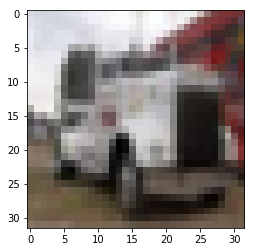

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 49999)
print("標籤:", mapdict[y_train[c][0]])
plt.imshow(x_train[c])

In [16]:
# normalize: (0~1)
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# 目標: one-hot encoding
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
cnn = Sequential()
# 第一層: 把input shape設好
cnn.add(Conv2D(input_shape=(32, 32, 3), 
               kernel_size=(3, 3), 
               filters=32, 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(kernel_size=(3, 3), 
               filters=64, 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(kernel_size=(3, 3), 
               filters=128, 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(units=256, activation="relu"))
cnn.add(Dense(units=10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
__________

In [25]:
# 二分:binary_crossentropy
# 多元:categorical_crossentropy
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# batch_size: 每看幾筆做一次梯度更新(100~200)
# epochs: 每一筆資料要看過幾次
# 總梯度更新次數: 資料筆數 * epochs / batch_size
# validation_split: train_test_split
# verbose: 輸出log的程度, 2
train_history = cnn.fit(x_train_shape, y_train_onehot, batch_size=200, 
                epochs=10, validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 49s - loss: 1.5912 - acc: 0.4219 - val_loss: 1.3113 - val_acc: 0.5308
Epoch 2/10


In [ ]:
cnn.evaluate(x_test_shape, y_test_onehot)

In [ ]:
# 怎麼看幾次要停 - val_loss(藍線) -> 平緩 就可以停
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_history.history["val_loss"])
plt.plot(train_history.history["loss"])
plt.legend(["val loss", "loss"], loc="upper left")

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(cnn.predict_classes(x_test_shape), y_test))